#Pre-dependencies

In [ ]:
!pip install -q pydriller
!pip install -q GitPython
!sudo add-apt-repository -y ppa:git-core/ppa
!sudo apt update -qq
!sudo apt install -y git



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 3.2 MB/s eta 0:00:00
PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/git-core/ppa/ubuntu/ jammy main'
Description:
The most current stable version of Git for Ubuntu.

For release candidates, go to https://launchpad.net/~git-core/+archive/candidate .
More info: https://launchpad.net/~git-core/+archive/ubuntu/ppa
Adding repository.
Adding deb entry to /etc/apt/sources.list.d/git-core-ubuntu-ppa-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/git-core-ubuntu-ppa-jammy.list
Adding key to /etc/apt/trusted.gpg.d/git-core-ubuntu-ppa.gpg with fingerprint F911AB184317630C59970973E363C90F8F1B6217
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://arc

In [ ]:
!git clone https://github.com/ishepard/pydriller



Cloning into 'pydriller'...
remote: Enumerating objects: 4976, done.
remote: Counting objects: 100% (569/569), done.
remote: Compressing objects: 100% (141/141), done.
remote: Total 4976 (delta 451), reused 445 (delta 426), pack-reused 4407 (from 2)
Receiving objects: 100% (4976/4976), 77.49 MiB | 91.41 MiB/s, done.
Resolving deltas: 100% (3296/3296), done.


In [ ]:
!git config --global --add safe.directory '*'


In [ ]:
cd "pydriller"


/content/pydriller


In [ ]:
!pip install -r requirements.txt
!pip install -r test-requirements.txt
!unzip test-repos.zip


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 1.8 MB/s eta 0:00:00
  Attempting uninstall: lizard
    Found existing installation: lizard 1.17.25
    Uninstalling lizard-1.17.25:
      Successfully uninstalled lizard-1.17.25
Archive:  test-repos.zip
   creating: test-repos/
   creating: test-repos/histogram/
   creating: test-repos/histogram/.git/
   creating: test-repos/histogram/.git/info/
  inflating: test-repos/histogram/.git/info/exclude  
  inflating: test-repos/histogram/.git/index  
  inflating: test-repos/histogram/.git/description  
   creating: test-repos/histogram/.git/branches/
   creating: test-repos/histogram/.git/refs/
   creating: test-repos/histogram/.git/refs/heads/
 extracting: test-repos/histogram/.git/refs/heads/master  
   creating: test-repos/histogram/.git/refs/tags/
   creating: test-repos/histogram/.git/objects/
   creating: test-repos/histogram/.git/objects/f9/
 extracting: test-repos/histogram/.git/objects/f9/8b1f685e1cc2bc781646b57b992e2c7a9da25

In [ ]:
#!pytest

#Gathering repos that may be useful for us

In [ ]:
import requests
repo_list = []

def search_open_source_apps(language="Python", license_type="mit", sort="stars",created_before="2020-01-01", order="desc", per_page=100):
    url = "https://api.github.com/search/repositories"

    # Filtering open-source software projects
    query = f' language:>Python size:>100000 license:{license_type} created:<{created_before} pushed:>2021-01-01'

    params = {
        "q": query,
        "sort": sort,   # Sort by stars, forks, or creation date
        "order": order,  # "desc" for most recent or highest first
        "per_page": per_page
    }

    headers = {"Accept": "application/vnd.github.v3+json"}
    response = requests.get(url, params=params, headers=headers)

    if response.status_code == 200:
        repos = response.json()["items"]
        for repo in repos:
            print(f"Repo: {repo['full_name']}, Size: {repo['size']} Stars: {repo['stargazers_count']}, Created: {repo['created_at']}")
            repo_list.append(repo['full_name'])
    else:
        print(f"Error: {response.status_code}, {response.text}")

# Example: Search for Python open-source apps with MIT license
search_open_source_apps(language="Python", license_type="mit")


Repo: facebook/react, Size: 842597 Stars: 234727, Created: 2013-05-24T16:15:54Z
Repo: twbs/bootstrap, Size: 254481 Stars: 172209, Created: 2011-07-29T21:19:00Z
Repo: microsoft/vscode, Size: 1002166 Stars: 170243, Created: 2015-09-03T20:23:38Z
Repo: vercel/next.js, Size: 2225391 Stars: 131227, Created: 2016-10-05T23:32:51Z
Repo: facebook/react-native, Size: 913848 Stars: 121611, Created: 2015-01-09T18:10:16Z
Repo: microsoft/PowerToys, Size: 424885 Stars: 117524, Created: 2019-05-01T17:44:02Z
Repo: electron/electron, Size: 167789 Stars: 116458, Created: 2013-04-12T01:47:36Z
Repo: mrdoob/three.js, Size: 1429631 Stars: 105792, Created: 2010-03-23T18:58:01Z
Repo: denoland/deno, Size: 169803 Stars: 102679, Created: 2018-05-15T01:34:26Z
Repo: microsoft/terminal, Size: 152419 Stars: 97754, Created: 2017-08-11T18:38:22Z
Repo: angular/angular, Size: 532512 Stars: 97530, Created: 2014-09-18T16:12:01Z
Repo: godotengine/godot, Size: 1541574 Stars: 96370, Created: 2014-01-04T16:05:36Z
Repo: mui/mate

In [ ]:
cd ..


/


In [ ]:
OWNER = "django"
REPO = "django"


##**Traverse Git Repo without cloning**

In [ ]:
from pydriller import Repository


##**Cloning one repo**

In [40]:
from pydriller import Git
import os
from git import Repo, InvalidGitRepositoryError

def clone_repo(repo_full_name, clone_path="/content/drive/MyDrive/Research/repo"):

  clone_path = f"/content/drive/MyDrive/Research/repo/{repo_full_name}"

  if os.path.exists(clone_path):
    try:
        repo = Repo(clone_path)
        if repo.remotes:
            print(f"Repository already cloned at {clone_path}")
        else:
            print(f"Directory {clone_path} exists but is not a Git repository.")
    except InvalidGitRepositoryError:
        print(f"Directory {clone_path} exists but is not a valid Git repository.")
  else:
    # Clone the repository if it doesn't exist
    Repo.clone_from(f"https://github.com/{repo_full_name}", clone_path)
    print(f"Repository cloned successfully at {clone_path}")



AUTHORS           eslint.config.mjs  js_tests/       package.json    tests/
CONTRIBUTING.rst  extras/            LICENSE         pyproject.toml  tox.ini
django/           Gruntfile.js       LICENSE.python  README.rst
docs/             INSTALL            MANIFEST.in     scripts/


In [41]:
clone_repo("django/django","." )

Repository cloned successfully at /content/drive/MyDrive/Research/repo/django/django


##**Isolate files with certain technologies (Python), then extracting the commits concerning those files.**

In [ ]:

def get_latest_commit_files(repo_full_name, extensions="py", clone_path="/content/drive/MyDrive/Research/repo" ):


   # Get the latest commit
  latest_commit = next(Repository(clone_path+f"/{repo_full_name}").traverse_commits())

  # Extract Python files from the latest commit
  py_files = [mod for mod in latest_commit.modified_files if mod.filename.endswith(f".{extensions}")]

  # Print file names and content
  for file in py_files:
      print(f"File: {file.filename}")
      print(file.source_code)  # Get the full content of the file

#get_latest_commit_files(repo_list[0])

def get_files_by_extension(repo_full_name, extensions, clone_path="/content/drive/MyDrive/Research/repo"):
    matching_files = []
    repo_path = f"{clone_path}/{repo_full_name}"

    for root, _, files in os.walk(repo_path):
        for file in files:
            if any(file.endswith(ext) for ext in extensions):
                full_path = os.path.join(root, file)
                matching_files.append(full_path)

    return matching_files

def analyze_file_commit_history(repo_path, file_path):
    """
    Analyze the commit history of a specific file.

    :param repo_path: Path to the Git repository.
    :param file_path: Path to the file relative to repo root.
    """
    relative_path = os.path.relpath(file_path, repo_path)  # Convert absolute to relative path

    print(f"\nAnalyzing history for file: {relative_path}")

    for commit in Repository(repo_path, filepath=relative_path).traverse_commits():
        print(f"Commit {commit.hash} by {commit.author.name} on {commit.author_date}")
        print(f"Message: {commit.msg}")
        for file in commit.modified_files:
            if file.new_path == relative_path or file.old_path == relative_path:
                print(f"  - Added lines: {file.added_lines}, Deleted lines: {file.deleted_lines}")
                print(f"  - Change Type: {file.change_type}")
                print(f"  - Diff:\n{file.diff}\n")
def analyze_file_commit_history_simple(repo_path, file_path):
    """
    Analyze the commit history of a specific file.

    :param repo_path: Path to the Git repository.
    :param file_path: Path to the file relative to repo root.
    """
    relative_path = os.path.relpath(file_path, repo_path)  # Convert absolute to relative path

    print(f"\nAnalyzing history for file: {relative_path}")

    for commit in Repository(repo_path, filepath=relative_path).traverse_commits():
        print(f"Commit {commit.hash} by {commit.author.name} on {commit.author_date}")



##Utility Functions for cloning repos and extracting versions of code pre 2020 and post 2020

In [ ]:
from datetime import datetime, timezone


def extract_pre_2020_cloning(repo_full_name, file_path):
  # Define the reference date
  reference_date = datetime(2020, 1, 1, tzinfo=timezone.utc)  # January 1, 2020

  relative_path = os.path.relpath(file_path, repo_path)  # Convert absolute to relative path
  most_recent_date=datetime(2000, 1, 1, tzinfo=timezone.utc)
  retained_commit=[]
  for commit in Repository(repo_path, filepath=relative_path).traverse_commits():
      if commit.author_date<reference_date and commit.author_date>most_recent_date:
          most_recent_date=commit.author_date
          retained_commit=commit.modified_files


  for modified_file in retained_commit:
    if modified_file.new_path == relative_path or modified_file.old_path == relative_path:
        return modified_file.source_code  # Print the source code

  return -1




def extract_post_2020_cloning(repo_full_name, file_path):
    # Define the reference date
  reference_date = datetime(2020, 1, 1, tzinfo=timezone.utc)  # January 1, 2020
  relative_path = os.path.relpath(file_path, repo_path)  # Convert absolute to relative path

  most_recent_date=datetime(2000, 1, 1, tzinfo=timezone.utc)
  retained_commit=[]

  for commit in Repository(repo_path, filepath=relative_path).traverse_commits():
      if commit.author_date>reference_date and commit.author_date>most_recent_date:
          most_recent_date=commit.author_date
          retained_commit=commit.modified_files


  for modified_file in retained_commit:
    if modified_file.new_path == relative_path or modified_file.old_path == relative_path:
        return modified_file.source_code  # Print the source code

  return -1




#Using **ZeroGPT's API** to detect AI generated code

In [74]:
import requests
def get_fake_percentage_zerogpt(text):
  # Replace with your ZeroGPT API key
  api_key = 'ced2c288-1758-426b-8585-f7b63392bb58'

  # Function to send text to ZeroGPT API for detection
  def detect_ai_generated_text(text):
    # Define the API URL
    url = "https://api.zerogpt.com/api/detect/detectText"

    # Define the headers, including the API Key and Authorization token
    headers = {
        "ApiKey": api_key,  # Replace with actual API key
    }

    # Define the form data to be sent in the request body
    # Make sure to replace 'your_file' with the actual file or data you need to send
    body = {
    "input_text": text,
    "originalParagraph": "string",
    "textWords": 0,
    "aiWords": 0,
    "fakePercentage": 0,
    "sentences": [],
    "h": [],
    "collection_id": 0,
    "fileName": "string",
    "feedback": "string"
  }

    # Send the POST request
    response = requests.post(url, headers=headers, json=body)

    # Check the response status code
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()
        return data
    else:
        return -1

  # Run the detection function
  response=detect_ai_generated_text(text)
  if response==-1:
    return -1
  data_field = response.get('data', None)
  if data_field==None:
    return -1
  else:
    data_field=data_field.get('fakePercentage', None)
    if data_field==None:
      return -1
  return data_field


#Analysis (with cloning)
###extracts files that had commits after 2020 and before 2020 and performs tests to see if there's AI in there or not.

Not perfect since, maybe in the same file, there wont be much change from pre 2020, to post 2020, so we require some further filters to ensure the difference is significative enough before adding them to a batch post 2020 for example.

example: they created a file, abc.py in 2016, modified it a lot until 2019, then they did minor modifications once or twice after 2020. Using the post 2020 file versus the 2016 one doesn't seem accurate because it's not a new file. the minor changes it had aren't representative of code that's recent because the majority of the code was written pre 2020

In [ ]:
def analysis_clone(repo_full_name, extension="py", repo_path=f"/content/drive/MyDrive/Research/repo/"):
  matching_files=get_files_by_extension(repo_full_name,[extension])
  #adding supplementary filters just in case we need further filtering
  #matching_files=apply_filters(matching_files)
  repo_path +=repo_full_name

  batch_pre_2020=[]
  batch_post_2020=[]

  for file in matching_files:
    print(file)
    analyze_file_commit_history_simple(repo_path, matching_files[0])

    #extract most complete file version pre 2020
    pre_2020=extract_pre_2020_cloning(repo_full_name, file)

    #extract most complete file version post 2020
    post_2020=extract_post_2020_cloning(repo_full_name, file)

    if pre_2020!=-1:
      batch_pre_2020.append(pre_2020)
    if post_2020!=-1:
      batch_post_2020.append(post_2020)



**Get files by their extensions from a repo full name without cloning it**

Actually returns them with their respective relative path to the repo.

In [ ]:
def get_files_by_extension_no_cloning(repo_full_name, extensions=['py']):
  repo_url = f"https://github.com/{repo_full_name}"
  #Fetch all commits
  repo = Repository(repo_url)
  files_in_latest_commit = set()
  files_in_latest_commit_path = set()


  # Traverse all commits to get the modified files
  for commit in repo.traverse_commits():
    if len(files_in_latest_commit)>=100:
      break
      for file in commit.modified_files:
        if any(file.filename.endswith(f'.{extension}') for extension in extensions):
          files_in_latest_commit.add(file.filename)
          files_in_latest_commit_path.add(file.new_path)

  return files_in_latest_commit_path


**Tool-Functions** to help Analysis without **cloning**

In [ ]:
from datetime import datetime, timezone
from copy import deepcopy as copy
import subprocess
import requests

def extract_pre_2020(repo_full_name, file_path):
  repo_url = f"https://github.com/{repo_full_name}"
  # Ensure Git treats the repository as safe
  # Define the reference date
  reference_date = datetime(2020, 1, 1, tzinfo=timezone.utc)  # January 1, 2020
  most_recent_date=datetime(2000, 1, 1, tzinfo=timezone.utc)
  retained_commit=[]


  for commit in Repository(repo_url, filepath=file_path).traverse_commits():
      if commit.author_date<reference_date and commit.author_date>most_recent_date:
          most_recent_date=commit.author_date
          retained_commit=copy(commit.hash)
  for commit in Repository(repo_url, filepath=file_path).traverse_commits():
    if commit.hash==retained_commit:
      for modified_file in commit.modified_files:
        if modified_file.new_path == file_path or modified_file.old_path == file_path:
            return requests.get(f'https://raw.githubusercontent.com/{repo_full_name}/{commit.hash}/{modified_file.new_path}').text



  return -1




def extract_post_2020(repo_full_name, file_path):
  repo_url = f"https://github.com/{repo_full_name}"

  # Define the reference date
  reference_date = datetime(2020, 1, 1, tzinfo=timezone.utc)  # January 1, 2020
  most_recent_date=datetime(2000, 1, 1, tzinfo=timezone.utc)
  retained_commit=[]

  for commit in Repository(repo_url, filepath=file_path).traverse_commits():
      if commit.author_date>reference_date and commit.author_date>most_recent_date:
          most_recent_date=commit.author_date
          retained_commit=copy(commit.hash)
  for commit in Repository(repo_url, filepath=file_path).traverse_commits():
    if commit.hash==retained_commit:
      for modified_file in commit.modified_files:
        if modified_file.new_path == file_path or modified_file.old_path == file_path:
            return requests.get(f'https://raw.githubusercontent.com/{repo_full_name}/{commit.hash}/{modified_file.new_path}').text

  return -1




## Django Repo Analysis #

In [ ]:
import pandas as pd
from pydriller import Repository
from datetime import datetime
import os

def extract_commit_data(repo_path):
    data = []

    for commit in Repository(repo_path).traverse_commits():
        commit_time = commit.author_date
        added_code_blocks = []

        for mod in commit.modified_files:
            if mod.filename.endswith(".py") and mod.added_lines > 0:
                if mod.diff is not None:
                    added_lines = []
                    for line in mod.diff.splitlines():
                        if line.startswith('+') and not line.startswith('+++'):
                            added_lines.append(line[1:].strip())
                    if added_lines:
                        added_code_blocks.append('\n'.join(added_lines))

        if added_code_blocks:
            data.append({
                'timestamp': int(commit_time.timestamp()),
                'code_added': added_code_blocks
            })

    df = pd.DataFrame(data)
    df = df.sort_values(by='timestamp').reset_index(drop=True)
    return df


In [44]:
repo_local_path = 'django/django'
df = extract_commit_data(repo_local_path)
print(df.head())


    timestamp                                         code_added
0  1121217957  ["Daily cleanup file"\n\nfrom django.core.db i...
1  1121217957  [#!/usr/bin/env python\n\n"""\nScript to build...
2  1121288396  [conn_string = "user=%s dbname=%s" % (DATABASE...
3  1121304743  [for i, subdir in enumerate(subdirs):\nif subd...
4  1121311029  [return str(self.user.get_permission_list()), ...


In [47]:
df.to_csv('django_django_commits.csv', index=False)

In [51]:
import copy
df=copy.deepcopy(my_secret_funing_df)


In [53]:
import pandas as pd

# Supposons que df existe déjà
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')

# Filtrer pour garder seulement les dates après 2016
df = df[df['timestamp'] > pd.Timestamp('2016-01-01')]

# Optionnel : reformater le timestamp comme tu voulais
df['formatted_time'] = df['timestamp'].dt.strftime('%Y/%m/%d/%S')



SyntaxError: unmatched ')' (<ipython-input-53-c6f47f192c81>, line 12)

In [55]:
df.to_csv('django_django_commits_filtered.csv', index=False)

In [57]:
df.head(-1)

,timestamp,code_added,formatted_time
13498,2016-01-02 06:44:33,"[def bisect_tests(bisection_label, options, te...",2016/01/02/33
13499,2016-01-02 11:00:25,[from order_with_respect_to.base_tests import ...,2016/01/02/25
13500,2016-01-02 11:44:06,[return bcrypt.gensalt(self.rounds)],2016/01/02/06
13501,2016-01-02 15:25:53,[if e.errno == errno.EADDRINUSE:],2016/01/02/53
13502,2016-01-02 19:11:18,"[raise CommandError(""No fixture named '%s' fou...",2016/01/02/18
...,...,...,...
21458,2025-04-12 17:39:07,"[suppress_warnings = [""app.add_directive"", ""ep...",2025/04/12/07
21459,2025-04-14 18:06:49,[if any(\nf.attname not in model_init_names fo...,2025/04/14/49
21460,2025-04-15 13:24:12,"[f""`delimiter=Value({delimiter!r})` to preserv...",2025/04/15/12
21461,2025-04-16 15:02:56,[raise ValidationError(\nself.get_error_messag...,2025/04/16/56


In [58]:
# Créer une colonne "annee_mois"
df['annee_mois'] = df['timestamp'].dt.to_period('M')

# Regrouper par mois et prendre max 10 éléments par groupe
monthly_lists = []
for period, group in df.groupby('annee_mois'):
    code_list = group['code_added'].tolist()[:10]
    monthly_lists.append(code_list)



In [63]:
monthly_dic = {}
for period, group in df.groupby('annee_mois'):
    code_list = group['code_added'].tolist()[:10]
    monthly_dic[period]=code_list



In [73]:
list(monthly_dic.keys())[0].start_time.strftime('%Y/%m/%d')

'2016/01/01'

In [85]:
monthly_dic_analysis_output=copy.deepcopy(monthly_dic)

for key, array in monthly_dic.items():
  print(key)

  monthly_array_analysis_output=[]
  for sub_array in array:
    i=0
    for code in sub_array:
      i+=1
      if i>3:
        break
      else:
        monthly_array_analysis_output.append(get_fake_percentage_zerogpt(code))
  print(monthly_array_analysis_output)
  numeric_values = [float(v) for v in monthly_array_analysis_output]

  # Compute average
  average = sum(numeric_values) / len(numeric_values)

  print("Average:", average)

  monthly_dic_analysis_output[key]=average



2016-01
[0.0, 0.0, 7.14, 0.0, 0.0, 0.0, 0.0, 93.33, 0.0, 0.0, 0.0, 41.94, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Average: 6.781428571428571
2016-02
[63.16, 0.0, 0.0, 0.0, 21.05, 58.82, 0.0, 0.0, 0.0, 0.0, 46.43, 0.0, 32.88, 0.0, 0.0, 0.0, 0.0, 0.0, 14.29, 0.0, 46.67]
Average: 13.49047619047619
2016-03
[0.0, 0.0, 0.0, 42.11, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.79, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Average: 3.78421052631579
2016-04
[0.0, 0.0, 0.0, 11.85, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 29.55, 31.58, 0.0, 40.91, 100.0, 0.0, 100.0, 0.0, 0.0]
Average: 13.647391304347826
2016-05
[0.0, 62.26, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 13.04, 21.62, 0.0, 25.0, 0.0, 11.94, 0.0, 0.0, 0.0, 0.0]
Average: 6.6930000000000005
2016-06
[0.0, 0.0, 0.0, 0.0, 0.0, 45.83, 0.0, 0.0, 0.0, 28.57, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 0.0, 0.0]
Average: 9.68888888888889
2016-07
[0.0, 0.0, 72.0, 31.43, 45.71, 3.85, 17.39, 2.42, 0.0, 2.33, 10.58, 100.0, 0.0, 0.0, 0.0, 38.89, 10.83, 24.85, 0.0]


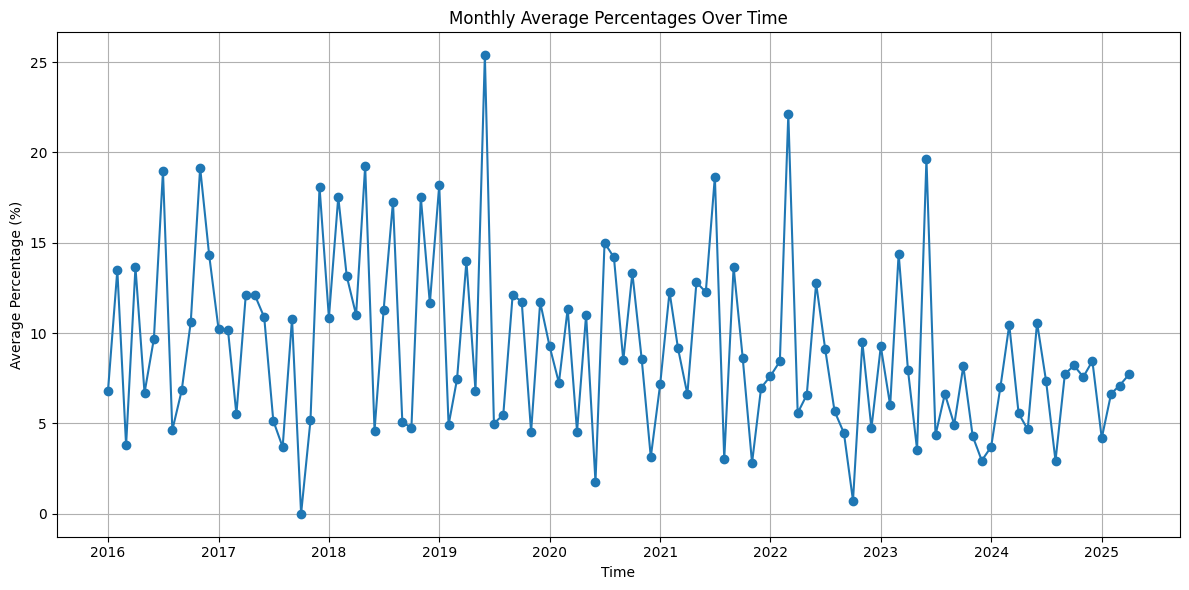

In [90]:
import matplotlib.pyplot as plt
import pandas as pd

data=copy.deepcopy(monthly_dic_analysis_output)
series = pd.Series(data).to_timestamp()
series.index = pd.to_datetime(series.index)

# Sort by date just in case
series = series.sort_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(series.index, series.values, marker='o')
plt.title('Monthly Average Percentages Over Time')
plt.xlabel('Time')
plt.ylabel('Average Percentage (%)')
plt.grid(True)
plt.tight_layout()
plt.show()


##Extract functions from Code in Python

0.0

In [ ]:
import ast
import inspect

def extract_functions(code):
    tree = ast.parse(code)
    functions = {}

    for node in ast.walk(tree):
        if isinstance(node, ast.FunctionDef):  # If it's a function definition
            start_line = node.lineno - 1  # AST line numbers start from 1
            end_line = node.end_lineno  # Get end line (Python 3.8+)
            function_code = "\n".join(code.splitlines()[start_line:end_line])
            functions[node.name] = function_code

    return functions  # Returns a dictionary {function_name: function_code}

# Example usage:
code_str = """
import math

def add(a, b):
    a=a+b
    b+=1
    return a + b

def multiply(x, y):
    return x * y

print(add(2, 3))
"""

functions = extract_functions(code_str)
for name, func in functions.items():
    print(f"Function {name}:\n{func}\n")


Function add:
def add(a, b):
    a=a+b
    b+=1
    return a + b

Function multiply:
def multiply(x, y):
    return x * y



#Analysis (without cloning)
###extracts files that had commits after 2020 and before 2020 and performs tests to see if there's AI in there or not.

Not perfect since, maybe in the same file, there wont be much change from pre 2020, to post 2020, so we require some further filters to ensure the difference is significative enough before adding them to a batch post 2020 for example.

example: they created a file, abc.py in 2016, modified it a lot until 2019, then they did minor modifications once or twice after 2020. Using the post 2020 file versus the 2016 one doesn't seem accurate because it's not a new file. the minor changes it had aren't representative of code that's recent because the majority of the code was written pre 2020

In [ ]:
from copy import deepcopy as copy
def analysis_remote(repo_full_name, extensions=["ts"]):
  matching_files=list(get_files_by_extension_no_cloning(repo_full_name,extensions))
  #adding supplementary filters just in case we need further filtering
  #matching_files=apply_filters(matching_files)
  batch_pre_2020=[]
  batch_post_2020=[]
  print(len(matching_files))
  for file in matching_files:
    if len(batch_pre_2020)>=20 and len(batch_post_2020)>=20:
      break
    #extract most complete file version pre 2020
    print("pre 2020:" + str(len(batch_pre_2020)))
    print("post 2020:" + str(len(batch_post_2020)))

    try:
      pre_2020=extract_pre_2020(repo_full_name, file)
    except:
      pre_2020=-1
    #extract most complete file version post 2020
    try:

      post_2020=extract_post_2020(repo_full_name, file)

    except:
      post_2020=-1

    if pre_2020!=-1 and pre_2020!=None:
      batch_pre_2020.append(pre_2020)
    if post_2020!=-1 and post_2020!=None:
      batch_post_2020.append(post_2020)

  results_batch_pre_2020=[]
  results_batch_post_2020=[]

  for code in batch_pre_2020:
    results_batch_pre_2020.append(get_fake_percentage_zerogpt(code))
  for code in batch_post_2020:
    results_batch_post_2020.append(get_fake_percentage_zerogpt(code))

  return [results_batch_pre_2020, results_batch_post_2020]



#Gathering Analysis Output for the first element of the repo list
Output contains 2 lists, one containing the pre 2020 source codes of files, the other one containing the post 2020 source codes of files.
The specific repo we have has not had any changes post 2020, so the only list that's not empty is the pre 2020 one.


In [ ]:

output=analysis_remote(OWNER+"/"+REPO)

169
pre 2020:0
post 2020:0
pre 2020:0
post 2020:0
pre 2020:0
post 2020:0
pre 2020:1
post 2020:1
pre 2020:2
post 2020:2
pre 2020:2
post 2020:2
pre 2020:2
post 2020:2
pre 2020:2
post 2020:2
pre 2020:2
post 2020:2
pre 2020:2
post 2020:2
pre 2020:2
post 2020:2
pre 2020:2
post 2020:2
pre 2020:2
post 2020:2
pre 2020:2
post 2020:2
pre 2020:2
post 2020:2
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:3
post 2020:3
pre 2020:4
post 2020:4
pre 2020:4
post 2020:4
pre 2020:4
post 2020:4
pre 2020:4
post 2020:4
pre 2020:5
post 2020:5
pre 2020:5
post 2020:5
pre 2020:5
post 2020:5
pre 2020:5
post 2020:5
pre 2020:5
post 2020:5
pre 2020:5
post 2020:5
pre 202

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data
before_2020 = output[0]
after_2020 = output[1]

# Scatter plot
plt.figure(figsize=(10, 2))
plt.scatter(before_2020, [1]*len(before_2020), color='blue', label='Before 2020')
plt.scatter(after_2020, [1.2]*len(after_2020), color='orange', label='After 2020')

plt.xlabel('Detection Percentage (%)')
plt.title('AI Detection Percentages: Before vs After 2020')
plt.yticks([])
plt.legend()
plt.show()

plt.figure(figsize=(8, 5))
plt.hist(before_2020, bins=10, alpha=0.6, label='Before 2020', color='blue', edgecolor='black')
plt.hist(after_2020, bins=10, alpha=0.6, label='After 2020', color='orange', edgecolor='black')

plt.xlabel('Detection Percentage (%)')
plt.ylabel('Frequency')
plt.title('Distribution of AI Content Detection (Before vs After 2020)')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(8, 5))
sns.histplot(before_2020, kde=True, color='blue', bins=10, label='Before 2020', alpha=0.6)
sns.histplot(after_2020, kde=True, color='orange', bins=10, label='After 2020', alpha=0.6)

plt.xlabel('Detection Percentage (%)')
plt.ylabel('Frequency / Density')
plt.title('Histogram + KDE: AI Content Detection (Before vs After 2020)')
plt.legend()
plt.grid()
plt.show()




**Visualizing our Data**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example list of percentages
percentages = output[0]

# Create the scatter plot with emphasis on the percentages
plt.scatter(percentages, [1]*len(percentages), color='b', marker='o')  # All points will be on the same horizontal line

# Add labels and title
plt.xlabel('Percentage (%)')
plt.title('Percentage of AI generated content in the code')

# Adjust the y-axis to hide the unnecessary values
plt.yticks([])

# Show the plot
plt.show()
print("\n")

# Create the histogram
plt.hist(percentages, bins=10, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Detection Percentage (%)')
plt.ylabel('Frequency')
plt.title('Distribution of AI Content Detection Percentages')

# Show the plot
plt.show()

# Example list of percentages of detection
percentages = output[0]

# Create the KDE plot
sns.kdeplot(percentages, shade=True, color='blue')

# Add labels and title
plt.xlabel('Detection Percentage (%)')
plt.ylabel('Density')
plt.title('Kernel Density Estimate (KDE) of AI Content Detection Percentages')
# Set X-axis to start at 0
plt.xlim(left=0)  # Force x-axis to start at 0


# Show the plo
plt.show()
print("\n")
# Create the histogram and KDE plot together
sns.histplot(percentages, kde=True, color='skyblue', bins=10)

# Add labels and title
plt.xlabel('Detection Percentage (%)')
plt.ylabel('Frequency / Density')
plt.title('Histogram and KDE of AI Content Detection Percentages')

# Show the plot
plt.show()




# Trends and impacts
This seciton will comprise of trend analysis over repos of various metrics and indicators of activity (health metrics of git repository).

In [ ]:
import requests
import pandas as pd
from datetime import datetime
import time


headers = {"Authorization": f"token {TOKEN}"}
per_page = 100
page = 1

all_commits = []

while True:
    url = f"https://api.github.com/repos/{OWNER}/{REPO}/commits?per_page={per_page}&page={page}"
    response = requests.get(url, headers=headers)
    if response.status_code != 200:
        print(f"Error: {response.status_code}")
        break
    commits = response.json()

    if not commits:
        break

    for commit in commits:
        commit_date = commit["commit"]["author"]["date"]
        all_commits.append(commit_date)

    print(f"Fetched page {page} with {len(commits)} commits")
    page += 1
    time.sleep(0.5)  # to avoid rate limits

# Convert to DataFrame
commit_df = pd.DataFrame(all_commits, columns=["date"])
commit_df["date"] = pd.to_datetime(commit_df["date"])
commit_df["week"] = commit_df["date"].dt.to_period("W").apply(lambda r: r.start_time)

# Aggregate commits per week
weekly_commit_df = commit_df.groupby("week").size().reset_index(name="commits")

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(weekly_commit_df["week"], weekly_commit_df["commits"], label="Commits per Week", marker='o')
plt.title(f"Weekly Commit Activity for {OWNER}/{REPO}")
plt.xlabel("Week")
plt.ylabel("Commits")
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()


In [ ]:
# Fetch closed PRs
pr_data = requests.get(pr_url, headers=headers).json()

# Extract PR merge times
pr_times = [
    (pr["created_at"], pr["closed_at"])
    for pr in pr_data if pr.get("closed_at")
]

# Convert to DataFrame
pr_df = pd.DataFrame(pr_times, columns=["created_at", "closed_at"])
pr_df["created_at"] = pd.to_datetime(pr_df["created_at"])
pr_df["closed_at"] = pd.to_datetime(pr_df["closed_at"])
pr_df["time_to_merge"] = (pr_df["closed_at"] - pr_df["created_at"]).dt.total_seconds() / 3600  # Hours

print(pr_df.describe())  # Summary of merge times

df=pr_df
# Plot
plt.figure(figsize=(10, 5))
plt.plot(df["created_at"], df["time_to_merge"], marker="o", linestyle="-", color="blue", label="Time to Merge (days)")

# Formatting
plt.xticks(rotation=45)
plt.xlabel("Created At")
plt.ylabel("Time to Merge (hours)")
plt.title("Pull Request Merge Time Over Time")
plt.legend()
plt.grid()

plt.show()



In [ ]:

import numpy as np
from scipy.interpolate import make_interp_spline

per_page = 100
page = 1
issue_list = []

while True:
    issues_url = f"https://api.github.com/repos/{OWNER}/{REPO}/issues?state=all&per_page={per_page}&page={page}"
    response = requests.get(issues_url, headers=headers)
    issues_data = response.json()

    if not issues_data or len(issues_data) == 0:
        break  # exit loop when no more issues are returned

    for issue in issues_data:
        # Exclude pull requests (they also appear in /issues)
        if "pull_request" in issue:
            continue
        created_at = issue.get("created_at")
        closed_at = issue.get("closed_at")
        issue_list.append({"created_at": created_at, "closed_at": closed_at})

    page += 1

# Convert to DataFrame
issues_df = pd.DataFrame(issue_list)
issues_df["created_at"] = pd.to_datetime(issues_df["created_at"])
issues_df["closed_at"] = pd.to_datetime(issues_df["closed_at"])

issues_df["closed_at"].groupby(issues_df["closed_at"].dt.date).count().rolling(window=3, center=True).mean().plot(kind="line", figsize=(10, 5), label="Issues Opened", color="red")
issues_df["created_at"].groupby(issues_df["created_at"].dt.date).count().rolling(window=3, center=True).mean().plot(kind="line", figsize=(10, 5), label="Issues Closed", color="green")


"""
issues_df["closed_at"].groupby(issues_df["closed_at"].dt.date).count().plot(kind="line", figsize=(10, 5), label="Issues Opened", color="red")
issues_df["created_at"].groupby(issues_df["created_at"].dt.date).count().plot(kind="line", figsize=(10, 5), label="Issues Closed", color="green")
"""

plt.legend()
plt.title("Issues Opened & Closed Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Issues")
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Change format
plt.xticks(rotation=45)  # Incline les labels pour meilleure lisibilité
plt.show()



In [ ]:
import requests
import pandas as pd
import datetime

# Fetch issues data (last 100 issues)
issues_url = f"https://api.github.com/repos/{OWNER}/{REPO}/issues?state=all&per_page=100"
headers = {"Authorization": f"token {TOKEN}"}

# 🔹 Replace with your repository details
GITHUB_TOKEN = TOKEN
REPO_OWNER = OWNER
REPO_NAME = REPO

HEADERS = {"Authorization": f"token {GITHUB_TOKEN}"}

def get_pull_requests():
    pulls = []
    page = 1
    per_page = 100

    while True:
        url = f"https://api.github.com/repos/{REPO_OWNER}/{REPO_NAME}/pulls?state=all&per_page={per_page}&page={page}"
        response = requests.get(url, headers=HEADERS)
        pr_data = response.json()

        if not pr_data or len(pr_data) == 0:
            break  # no more data

        for pr in pr_data:
            pr_id = pr["number"]
            created_at = pr["created_at"]

            # Get comments, reviews, and reactions
            comments = get_pr_comments(pr_id)
            approvals, rejects = get_pr_reviews(pr_id)
            likes, dislikes = get_pr_reactions(pr_id)

            pulls.append([pr_id, created_at, comments, likes, approvals, rejects])

        page += 1

    return pd.DataFrame(pulls, columns=["pr_id", "created_at", "comments", "likes", "approvals", "rejects"])

def get_pr_comments(pr_id):
    """Fetch number of comments on a PR"""
    url = f"https://api.github.com/repos/{REPO_OWNER}/{REPO_NAME}/issues/{pr_id}/comments"
    response = requests.get(url, headers=HEADERS)
    return len(response.json())

def get_pr_reviews(pr_id):
    """Fetch approvals and rejections from PR reviews"""
    url = f"https://api.github.com/repos/{REPO_OWNER}/{REPO_NAME}/pulls/{pr_id}/reviews"
    response = requests.get(url, headers=HEADERS)
    reviews = response.json()

    approvals = sum(1 for r in reviews if r["state"] == "APPROVED")
    rejects = sum(1 for r in reviews if r["state"] == "CHANGES_REQUESTED")

    return approvals, rejects

def get_pr_reactions(pr_id):
    """Fetch reactions (likes/thumbs down) from PR comments"""
    url = f"https://api.github.com/repos/{REPO_OWNER}/{REPO_NAME}/issues/{pr_id}/reactions"
    headers = {**HEADERS, "Accept": "application/vnd.github.squirrel-girl-preview+json"}
    response = requests.get(url, headers=headers)
    reactions = response.json()

    likes = sum(1 for r in reactions if r["content"] == "+1")
    dislikes = sum(1 for r in reactions if r["content"] == "-1")

    return likes, dislikes

# Run the data extraction
df = get_pull_requests()
df["created_at"] = pd.to_datetime(df["created_at"])  # Convert date column

# Save to CSV
df.to_csv("github_pull_requests.csv", index=False)
df

In [ ]:
import matplotlib.pyplot as plt

# Sort by date
df = df.sort_values("created_at")

plt.figure(figsize=(12, 6))

plt.plot(df["created_at"], df["comments"], marker="o", linestyle="-", label="Comments", color="blue")
plt.plot(df["created_at"], df["likes"], marker="s", linestyle="-", label="Likes", color="green")
plt.plot(df["created_at"], df["approvals"], marker="^", linestyle="-", label="Approvals", color="purple")
plt.plot(df["created_at"], df["rejects"], marker="x", linestyle="-", label="Rejects", color="red")

plt.xticks(rotation=45)
plt.xlabel("Created At")
plt.ylabel("Count")
plt.title("PR Engagement Over Time")
plt.legend()
plt.grid()

plt.show()
